In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
df_train = pd.read_csv("/Users/dikien/Downloads/West Nile Virus Prediction/train.csv")
df_weather = pd.read_csv("/Users/dikien/Downloads/West Nile Virus Prediction/weather.csv")
df_spray = pd.read_csv("/Users/dikien/Downloads/West Nile Virus Prediction/spray.csv")

In [3]:
print df_train.head(2)
print df_train.describe() 
print "=" * 90
print df_weather.head(2)
print df_weather.describe()
print "=" * 90
print df_spray.head(2)
print df_spray.describe()

         Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
              Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000 

In [5]:
mapdata = np.loadtxt("/Users/dikien/Downloads/West Nile Virus Prediction/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv("/Users/dikien/Downloads/West Nile Virus Prediction/train.csv")[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

In [7]:
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

In [8]:
sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.02, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [9]:
xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

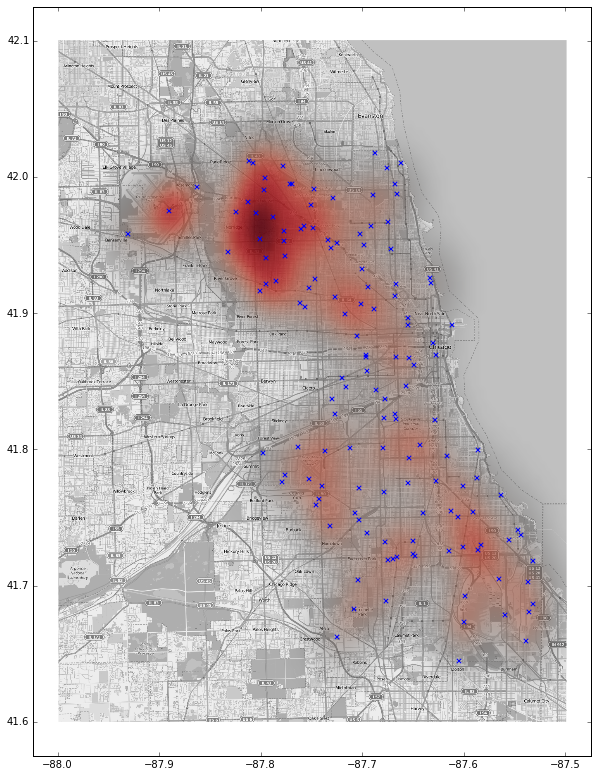

In [10]:
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

In [11]:
df_test = pd.read_csv("/Users/dikien/Downloads/West Nile Virus Prediction/test.csv")

In [12]:
df_test.columns

Index([u'Id', u'Date', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy'],
      dtype='object')

In [17]:
df = pd.read_csv("/Users/dikien/Downloads/West Nile Virus Prediction/sampleSubmission.csv", dtype={'Id': np.int, 'WnvPresent' : np.float32})

In [19]:
df.dtypes

Id              int64
WnvPresent    float32
dtype: object